<a href="https://colab.research.google.com/github/KoreTane/Statistics/blob/main/Regress%C3%A3oStartup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from google.colab import drive

In [2]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
df = pd.read_csv("Startups.csv")

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#EDA

In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
CountColNames = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']
## da pra fazer dessa forma, selecionando apenas os tipos numeros
CountColNames2 = list(df.select_dtypes(include='number').columns)

In [7]:
ncols = 3
nrows = int(np.ceil(len(CountColNames) / (1.0 * ncols)))

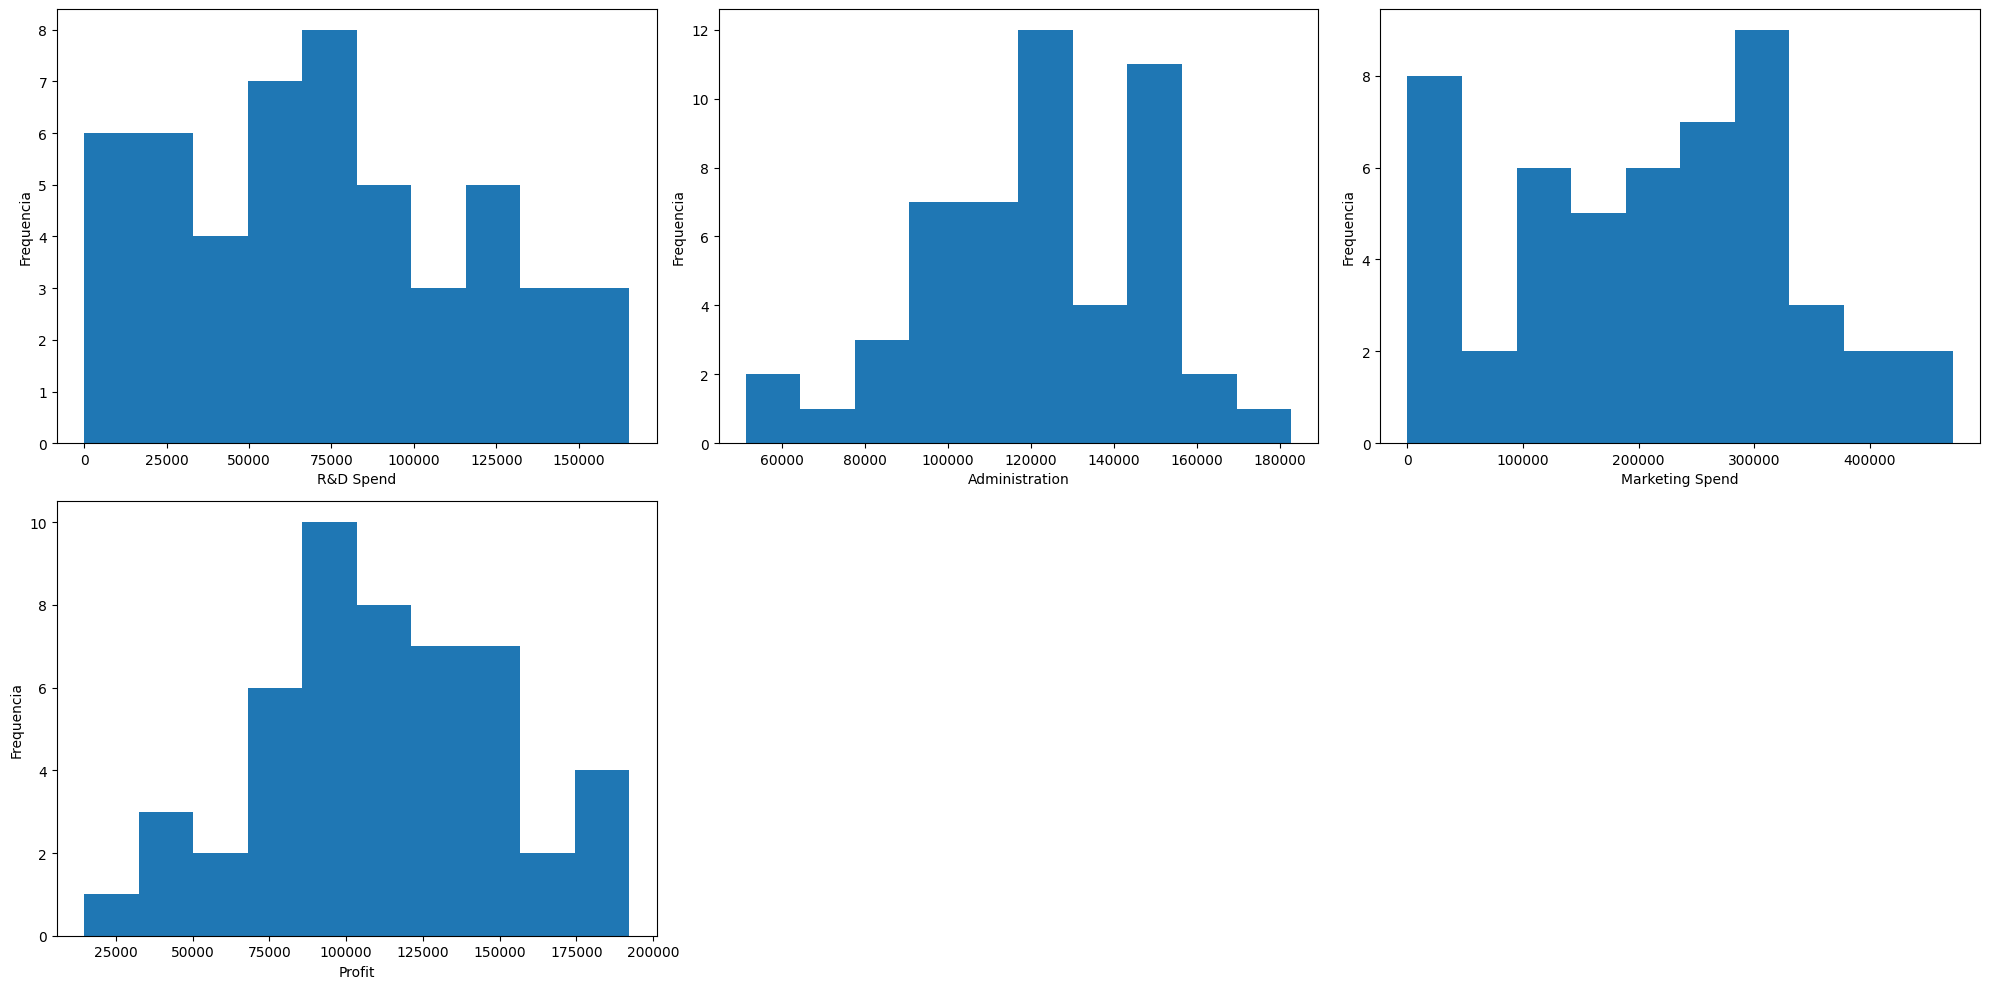

In [8]:
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10))

counter = 0

for i in range(nrows):
  for j in range(ncols):

    ax = axes[i] [j]

    # plotar somente quando tiver dados
    if counter < len(CountColNames):

      ax.hist(df.select_dtypes(include='number')[CountColNames[counter]],bins=10)
      ax.set_xlabel(CountColNames[counter])
      ax.set_ylabel('Frequencia')

    else:
      ax.set_axis_off()

    counter += 1

plt.tight_layout()
plt.show()

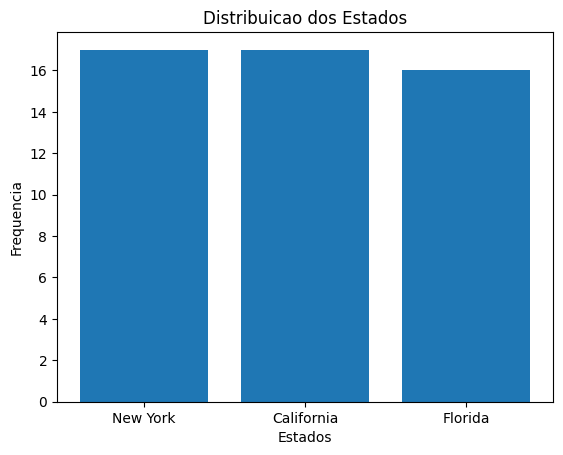

In [9]:
fig = plt.figure()

plt.bar(df['State'].unique(), df['State'].value_counts())

plt.title('Distribuicao dos Estados')
plt.xlabel('Estados')
plt.ylabel('Frequencia')

plt.show()

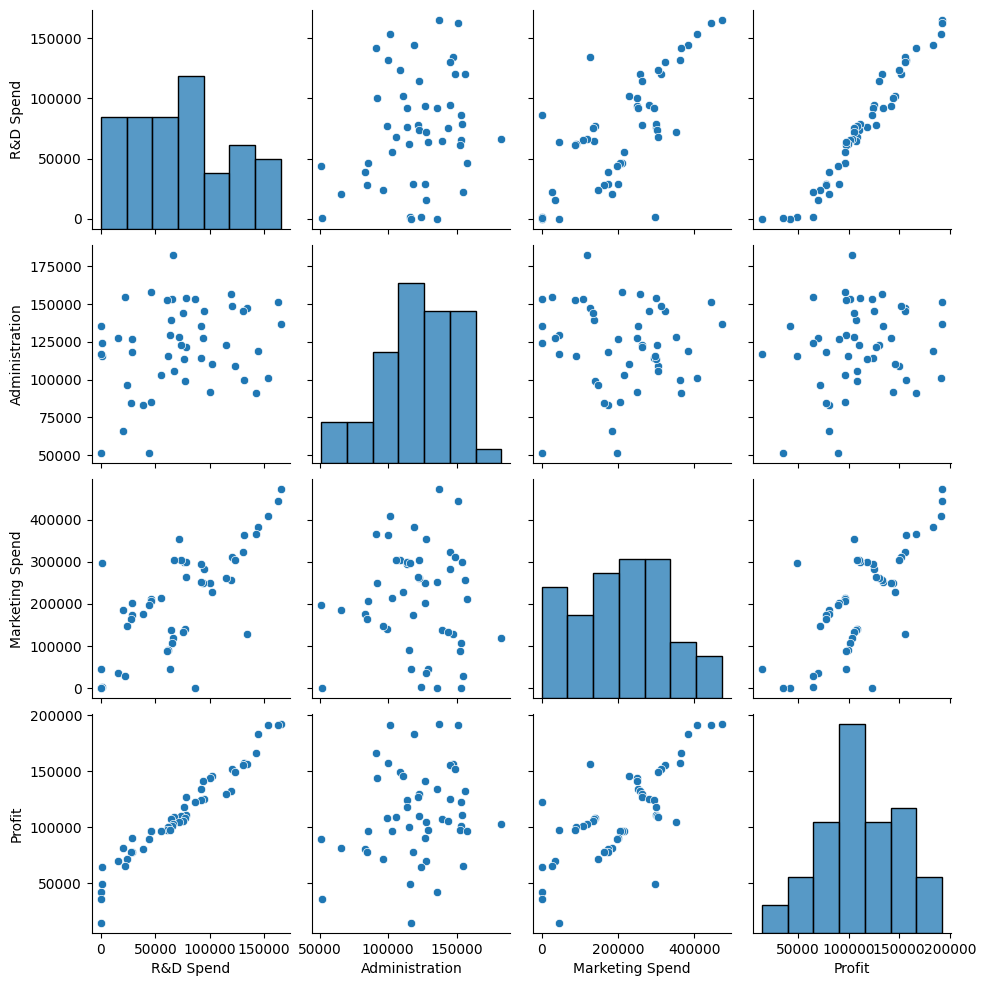

In [35]:
sns.pairplot(df)

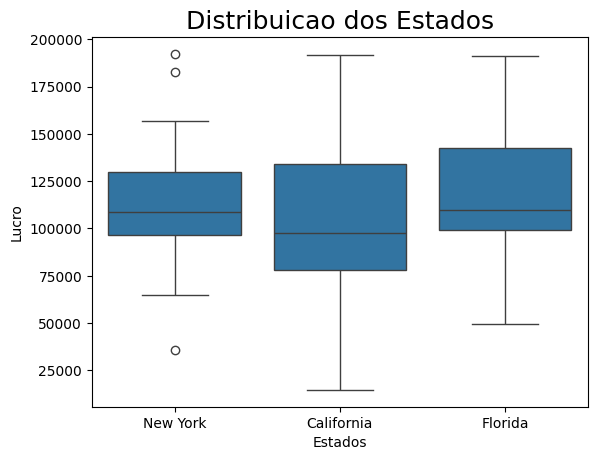

In [11]:
 #aqui exemplificamos que podemos plotar o gráfico utilizando uma biblioteca e outra para fazer as configurações
fig = plt.figure()

sns.boxplot(x= df['State'], y= df['Profit'])

plt.title('Distribuicao dos Estados', fontsize = 18, fontweight = 18, loc = 'center')
plt.xlabel('Estados')
plt.ylabel('Lucro')

plt.show()

## 3 Pré Processamento dos dados

### 3.1 Separar variáveis

###3.1.1 Variáveis contínuas

In [12]:
# dropando a variável target
dfNum = df.select_dtypes(include='number').drop(['Profit'], axis=1)

In [13]:
dfNum.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


## 3.1.2 Variáveis Categóricas

In [14]:
df['State'] = df['State'].astype('category')

dfCat = df.select_dtypes(include='category')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   State   50 non-null     category
dtypes: category(1)
memory usage: 314.0 bytes


In [15]:
dfCat.head()

,State
0,New York
1,California
2,Florida
3,New York
4,Florida


## 3.1.3 Resposta

In [16]:
y = df['Profit']

## 3.2 Prétratamento da resposta
Precisamos garantir que a resposta tenha a mesma distribuição normal ou o mais perto do real possível.


In [17]:
#vamos fazer o teste estatistico para avaliar a normalidade da resposta
kStat, kPvalue = sp.stats.kstest(rvs=y, cdf='norm')

In [18]:
kStat

np.float64(1.0)

In [19]:
kPvalue

np.float64(0.0)

## 3.2.3 Test Log da Resposta

In [20]:
#vamos fazer o teste estatistico para avaliar a normalidade da resposta
kStat, kPvalue = sp.stats.kstest(rvs=np.log(y), cdf='norm')

In [21]:
kStat

np.float64(1.0)

In [22]:
kPvalue

np.float64(0.0)

(array([ 1.,  0.,  0.,  1.,  2.,  2.,  6., 17., 11., 10.]),
 array([ 9.59433667,  9.85156434, 10.10879202, 10.36601969, 10.62324737,
        10.88047504, 11.13770272, 11.39493039, 11.65215807, 11.90938574,
        12.16661342]),
 <BarContainer object of 10 artists>)

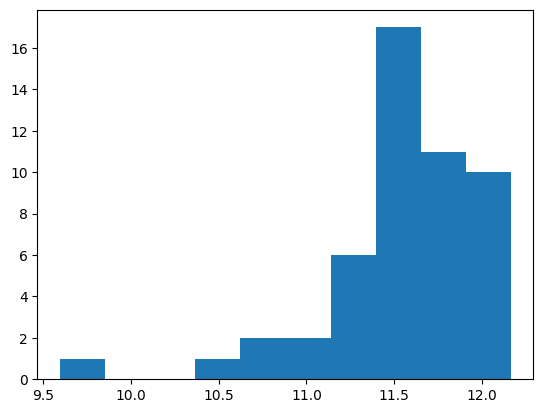

In [23]:
fig = plt.figure()

plt.hist(np.log(y))

### 3.3 Pré-tratamento das variáveis contínuas

In [24]:
#criar funcao para o escalonamento dos dados
def feature_scaling(X):

  #calcular media de todas as variaveis
  mu = np.mean(X, axis=0)

  #calcular desvio padrao de todas as variaveis
  sigma = np.std(X, axis=0, ddof=1)

  #fazer o escalonamento
  xNorm = (X - mu) /sigma

  return xNorm#, mu, sigma

In [28]:
dfNorm = feature_scaling(dfNum)

In [29]:
dfNorm

,R&D Spend,Administration,Marketing Spend
0,1.996146,0.555117,2.132295
1,1.936203,1.071924,1.904267
2,1.736731,-0.720938,1.610180
3,1.539157,-0.095396,1.407916
4,1.489812,-1.069066,1.268648
5,1.266937,-0.768437,1.241605
6,1.326598,0.922779,-0.681234
7,1.232543,0.863216,0.922817
8,1.020013,0.977033,0.822536
9,1.080846,-0.452051,0.768307


### 3.4 Pré-tratamento das variáveis categoricas

In [37]:
dfDum = pd.get_dummies(dfCat)
dfDum = dfDum.astype(int)

In [38]:
dfDum.head()

,State_California,State_Florida,State_New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [39]:
dfFinal = pd.concat([dfNorm, dfDum], axis=1)

In [40]:
dfFinal

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,1.996146,0.555117,2.132295,0,0,1
1,1.936203,1.071924,1.904267,1,0,0
2,1.736731,-0.720938,1.610180,0,1,0
3,1.539157,-0.095396,1.407916,0,0,1
4,1.489812,-1.069066,1.268648,0,1,0
5,1.266937,-0.768437,1.241605,0,0,1
6,1.326598,0.922779,-0.681234,1,0,0
7,1.232543,0.863216,0.922817,0,1,0
8,1.020013,0.977033,0.822536,0,0,1
9,1.080846,-0.452051,0.768307,1,0,0
